<a href="https://colab.research.google.com/github/harishahamed26/Fashion-MNIST/blob/main/Fashion_MNIST_Image_Classificaiton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion-MNIST - Image-Classificaiton

## Data Loading and EDA

In [1]:
# Importing of necessary libraries


import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tqdm import tqdm

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# defining the constant dimension 

RANDOM_SEED = 100

In [77]:
# Loading the Fashion Mnist data from the keras dataset

(X_train, Y_train), (X_test,Y_test) = tf.keras.datasets.fashion_mnist.load_data() 

In [79]:
LabelName = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [78]:
# Normalising the dataset

X_train = X_train.astype(float)/255.0
X_test  = X_test.astype(float)/255.0

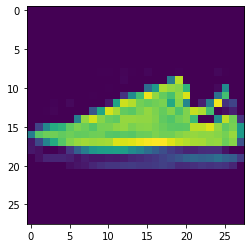

In [34]:
# Viewing of the Loaded Image

plt.imshow(X_train[6])

In [35]:
# checking the shape of the module
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

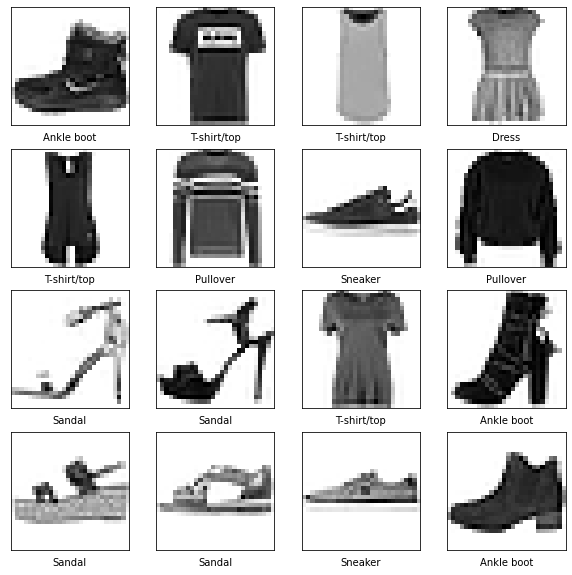

In [36]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(LabelName[Y_train[i]])
plt.show()

## Model Generation

In [80]:
# Defining Early Stop method
EarlyStop = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, 
                                          restore_best_weights=True)


In [81]:
# Fixing the random seed
#seed(1)
tf.random.set_seed(RANDOM_SEED)

# Creating a Feed-Forward Neural Network (FFNN)
FFNN = Sequential()
FFNN.add(tf.keras.layers.Input(shape=(28,28, 1)))
FFNN.add(tf.keras.layers.Flatten())
ffnn_filters = [1024, 512, 256, 128, 64, 32, 16]
for n_nodes in ffnn_filters:
    FFNN.add(tf.keras.layers.Dense(n_nodes, activation='relu'))  # hidden layer
FFNN.add(tf.keras.layers.Dense(10, activation='softmax'))        # output layer

FFNN.summary()  # Summary of the model


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_87 (Dense)            (None, 1024)              803840    
                                                                 
 dense_88 (Dense)            (None, 512)               524800    
                                                                 
 dense_89 (Dense)            (None, 256)               131328    
                                                                 
 dense_90 (Dense)            (None, 128)               32896     
                                                                 
 dense_91 (Dense)            (None, 64)                8256      
                                                                 
 dense_92 (Dense)            (None, 32)               

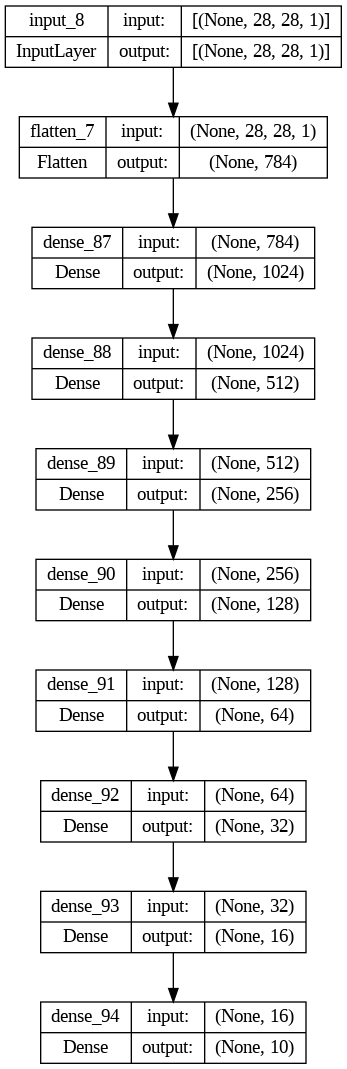

In [82]:
# Model Plotting using keras plot model 

keras.utils.plot_model(FFNN, to_file='model_plot.png', show_shapes=True,
                       show_layer_names=True)

In [83]:
FFNN.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [84]:
# checking the shape of the module
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape


((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [85]:
model_history = FFNN.fit(X_train, Y_train, epochs = 200, 
                         validation_split = 0.3, callbacks = EarlyStop)

Epoch 1/200
1313/1313 [==============================] - 42s 31ms/step - loss: 0.6022 - accuracy: 0.7856 - val_loss: 0.4678 - val_accuracy: 0.8323
Epoch 2/200
1313/1313 [==============================] - 44s 34ms/step - loss: 0.4148 - accuracy: 0.8493 - val_loss: 0.3936 - val_accuracy: 0.8593
Epoch 3/200
1313/1313 [==============================] - 40s 30ms/step - loss: 0.3703 - accuracy: 0.8642 - val_loss: 0.3914 - val_accuracy: 0.8572
Epoch 4/200
1313/1313 [==============================] - 39s 30ms/step - loss: 0.3455 - accuracy: 0.8742 - val_loss: 0.4025 - val_accuracy: 0.8552
Epoch 5/200
1313/1313 [==============================] - 38s 29ms/step - loss: 0.3202 - accuracy: 0.8822 - val_loss: 0.3739 - val_accuracy: 0.8692
Epoch 6/200
1313/1313 [==============================] - 38s 29ms/step - loss: 0.3082 - accuracy: 0.8886 - val_loss: 0.3430 - val_accuracy: 0.8803
Epoch 7/200
1313/1313 [==============================] - 38s 29ms/step - loss: 0.2942 - accuracy: 0.8925 - val_loss: 0

In [86]:
ev = FFNN.evaluate(X_test,Y_test)
print(f' Model Accuracy is {(ev[1]* 100):.2f}% and Model Loss : {(ev[0] * 100):.2f}%')


scores_val_accuracy = model_history.history['val_accuracy'][-1] * 100
print('\n')
print("Validation Score: %.2f%%" % (scores_val_accuracy))



313/313 [==============================] - 2s 7ms/step - loss: 0.3908 - accuracy: 0.8882
 Model Accuracy is 88.82% and Model Loss : 39.08%


Validation Score: 89.47%


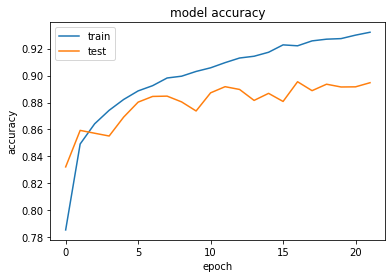

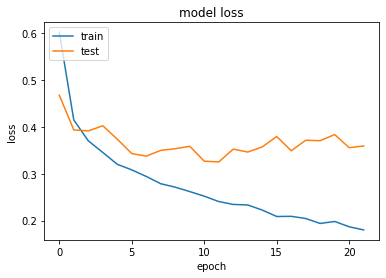

In [87]:
# summarize the history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()
     